In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import datetime

In [2]:
bill_data = pd.read_csv("bills.csv")
venue_data = pd.read_csv("venues.csv")

In [ ]:
q1_data = bill_data[['order_seated_at_local','order_closed_at_local','order_duration_seconds','bill_uuid','venue_xref_id']].copy()


In [4]:
def normalize_date(date):
    dt = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return dt

In [5]:
def split_by_venue(bill_data: pd.DataFrame, venues):
    data_by_venue = dict()
    for venue in venues:
        data_by_venue[venue] = bill_data.loc[bill_data['venue_xref_id'] == venue]
    return data_by_venue

In [ ]:
def split_by_concept(bill_data: pd.DataFrame, venue_data: pd.DataFrame):
    bills = bill_data.merge(venue_data[['venue_xref_id', 'concept']], on='venue_xref_id', how='left')
    concepts = list(set(venue_data["concept"].to_list()))
    data_by_concept = dict()
    for concept in concepts:
        data_by_concept[str(concept)] = bills[bills['concept'] == concept]
    
    return data_by_concept

    
    

In [7]:
x = q1_data["order_seated_at_local"][0]
print(normalize_date(x))

2024-07-01 09:16:15


In [8]:
data_by_venue = split_by_venue(bill_data, venue_data["venue_xref_id"])


In [9]:
data_by_concept = split_by_concept(q1_data, venue_data)

In [10]:
times = bill_data["order_seated_at_local"].copy()

mx = normalize_date(times[0])
mn = normalize_date(times[0])

for time in times:
    x = normalize_date(time)
    mx = max(mx, x)
    mn = min(mn, x)

print(mn)
print(mx)

2015-10-10 19:13:37
2025-01-01 18:57:30


In [13]:
def plot_data(data: pd.DataFrame):
    intervals = dict()
    for i in range(168):
        intervals[i] = 0
    for _, row in data.iterrows():
        d = normalize_date(row['order_seated_at_local'])
        weekday = d.weekday() * 24
        hour = d.hour
        intervals[weekday + hour] = intervals[weekday + hour] + 1

    scale = data.size // 6
    for i in range(168):
        intervals[i] = intervals[i] / scale

    x = list(range(168))
    y = [intervals[i] for i in list(range(168))]

    df = pd.DataFrame(list(intervals.items()), columns=['hour_of_week', 'value'])

    # Convert hour_of_week into day and hour
    df['day_of_week'] = df['hour_of_week'] // 24  # Day index (0=Monday, 6=Sunday)
    df['hour_of_day'] = df['hour_of_week'] % 24   # Hour of the day
    df['label'] = df['day_of_week'].map(
        {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    ) + ' ' + df['hour_of_day'].astype(str) + ':00'

    plt.figure(figsize=(12, 6))
    plt.bar(df['label'], df['value'], align='edge', width=1)

    tick_positions = df['hour_of_week'][::6]  # Select every 6th hour
    tick_labels = df['label'][::6]  # Select corresponding labels

    plt.xticks(tick_positions, tick_labels, rotation=90)
    plt.xlabel("Day & Hour")
    plt.ylabel("Value")
    plt.title("Hourly Data Over a Week")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


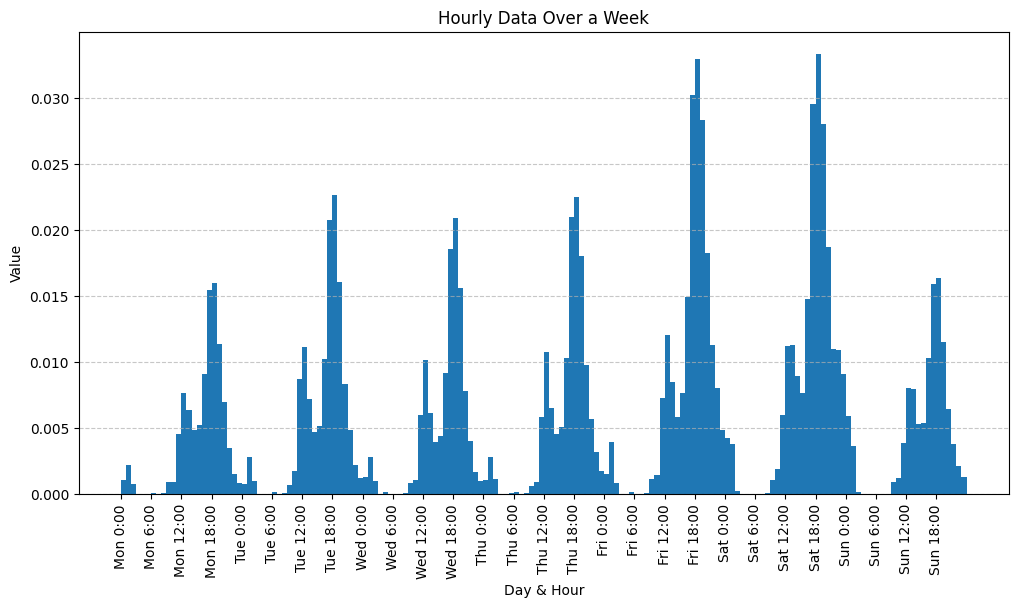

In [14]:
plot_data(data_by_concept['FINE_DINING'])

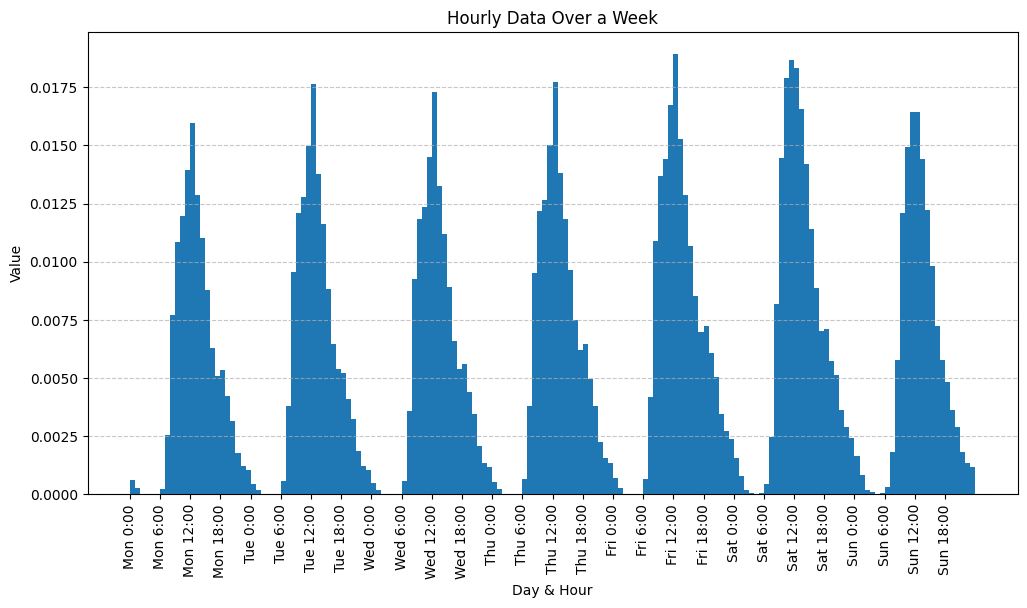

In [15]:
plot_data(data_by_concept['CAFE'])

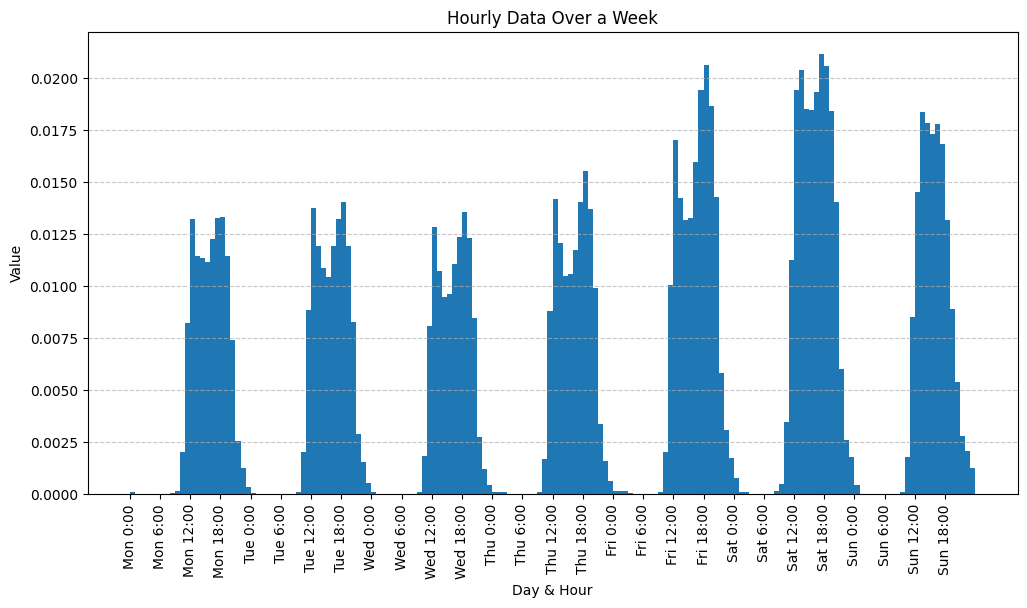

In [16]:
plot_data(data_by_concept['FAST_FOOD'])

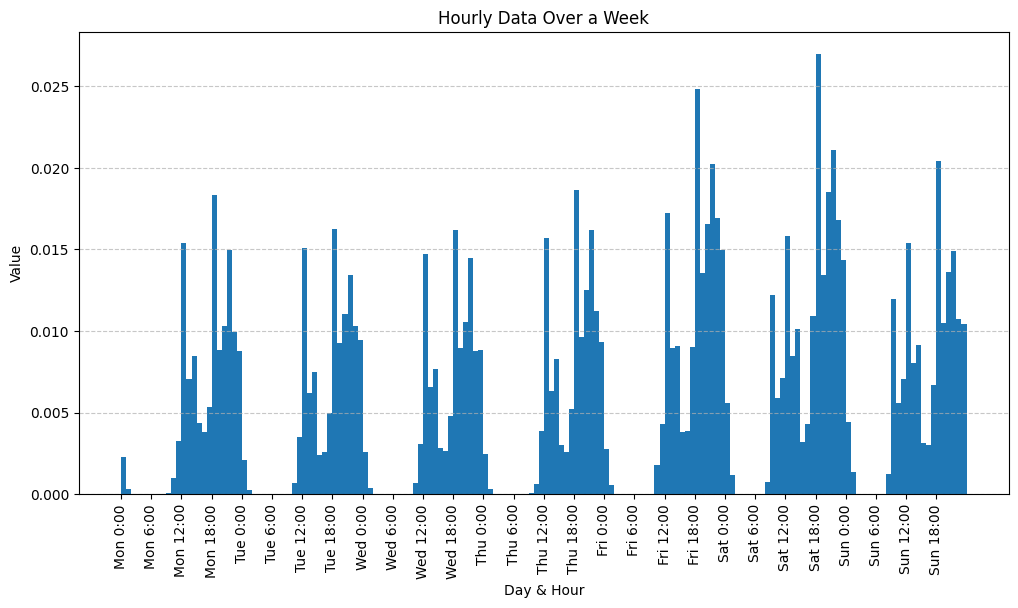

In [17]:
plot_data(data_by_concept['ENTERTAINMENT_COMPLEX'])

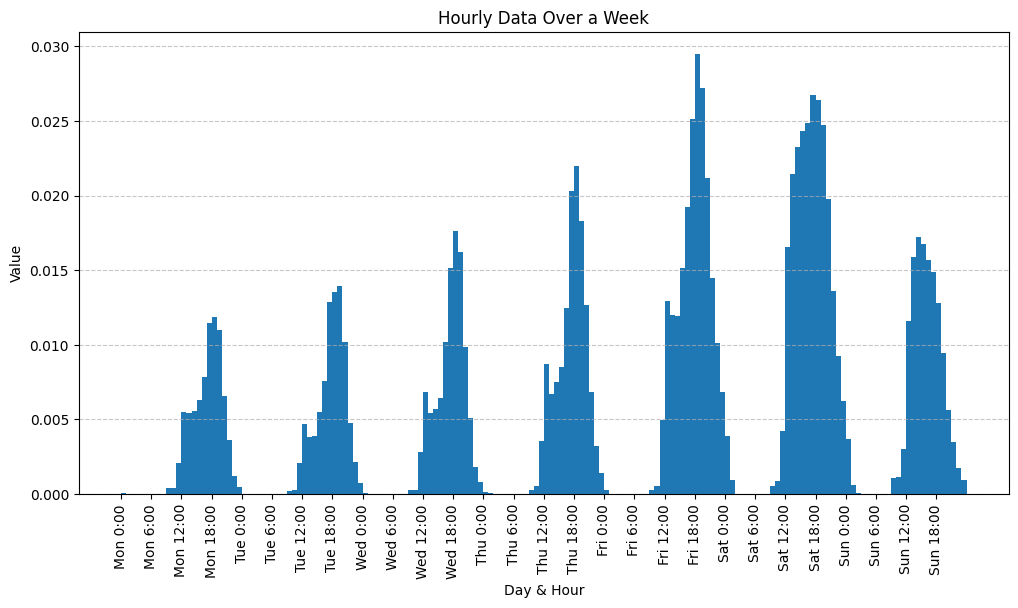

In [18]:
plot_data(data_by_concept['BREWERY'])

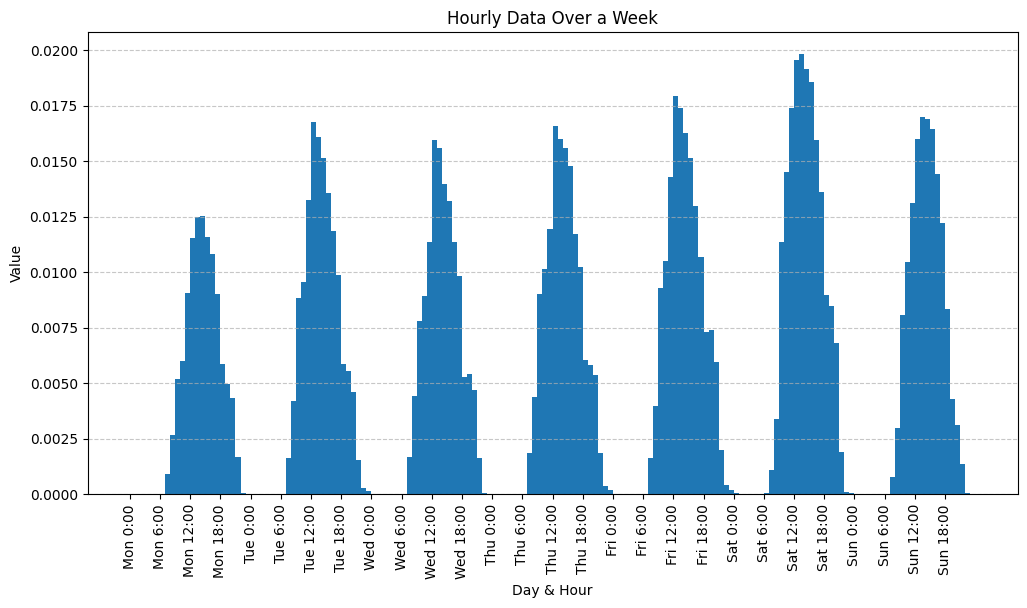

In [19]:
plot_data(data_by_concept['BAKERY'])

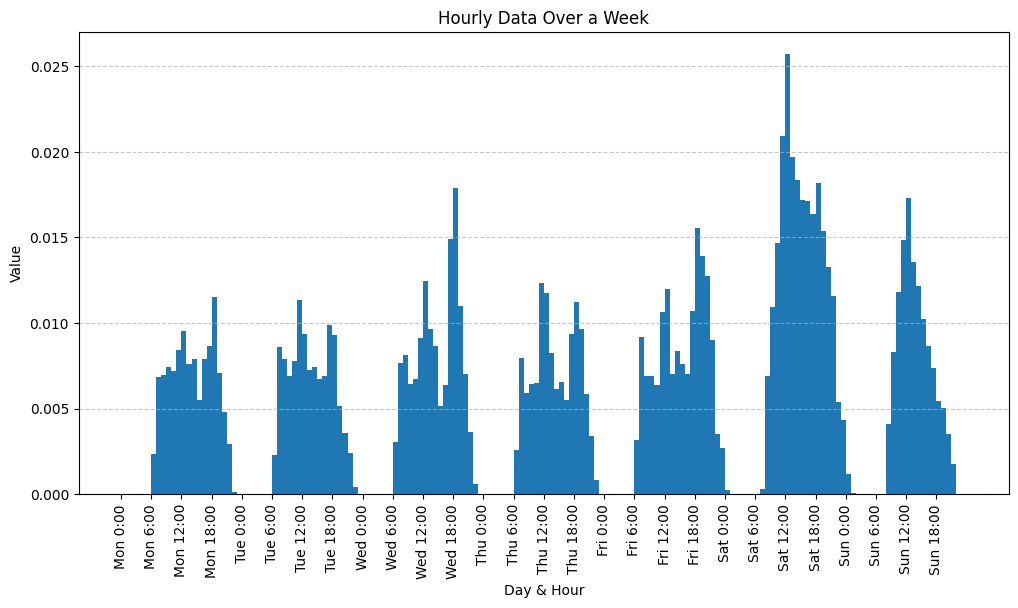

In [20]:
plot_data(data_by_concept['FOOD_TRUCK'])

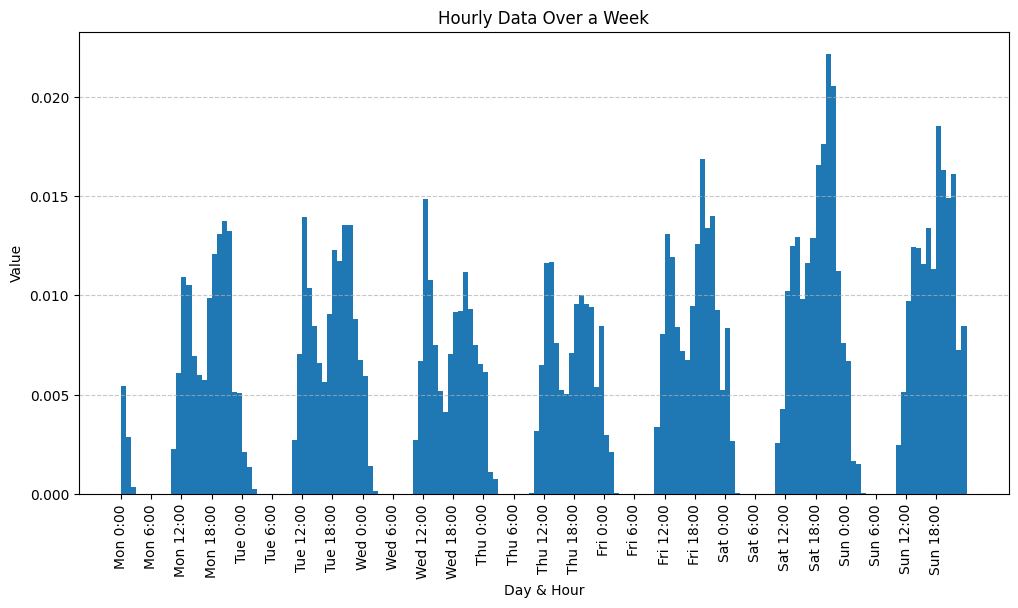

In [21]:
plot_data(data_by_concept['BUFFET'])

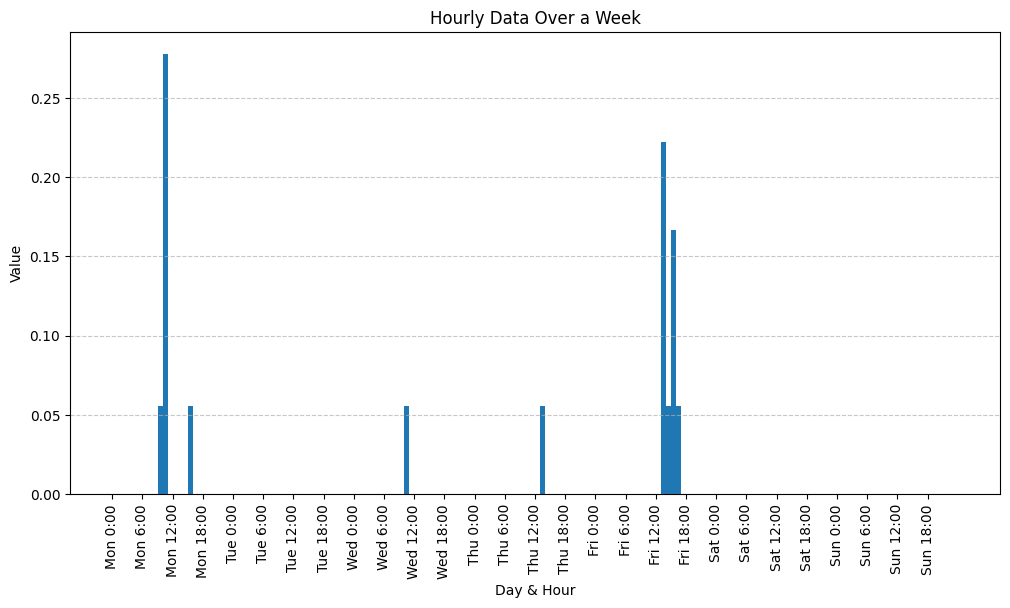

In [22]:
plot_data(data_by_concept['SPORTS_CLUB'])

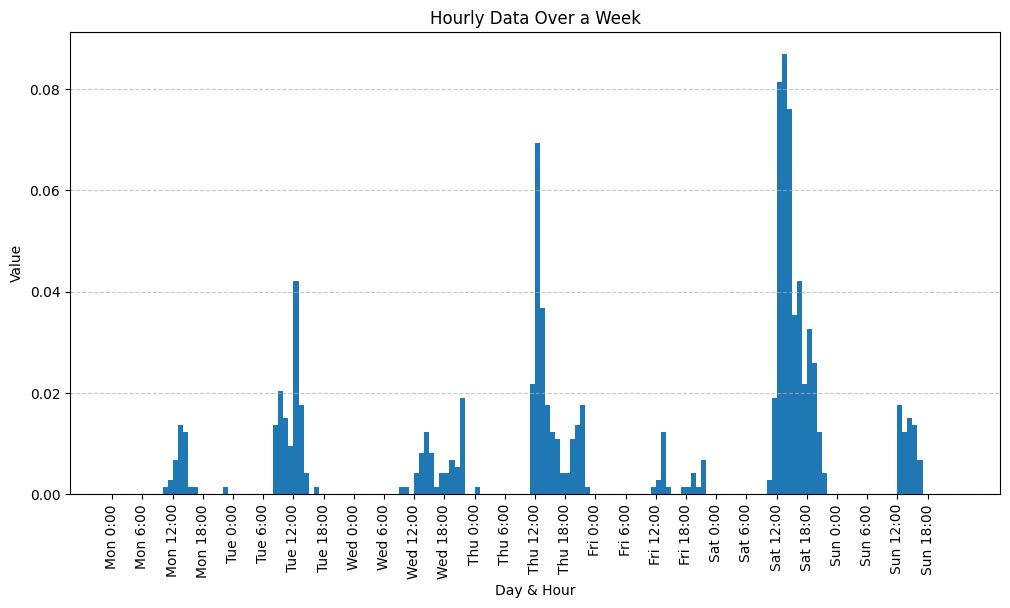

In [23]:
plot_data(data_by_concept['POP_UP'])

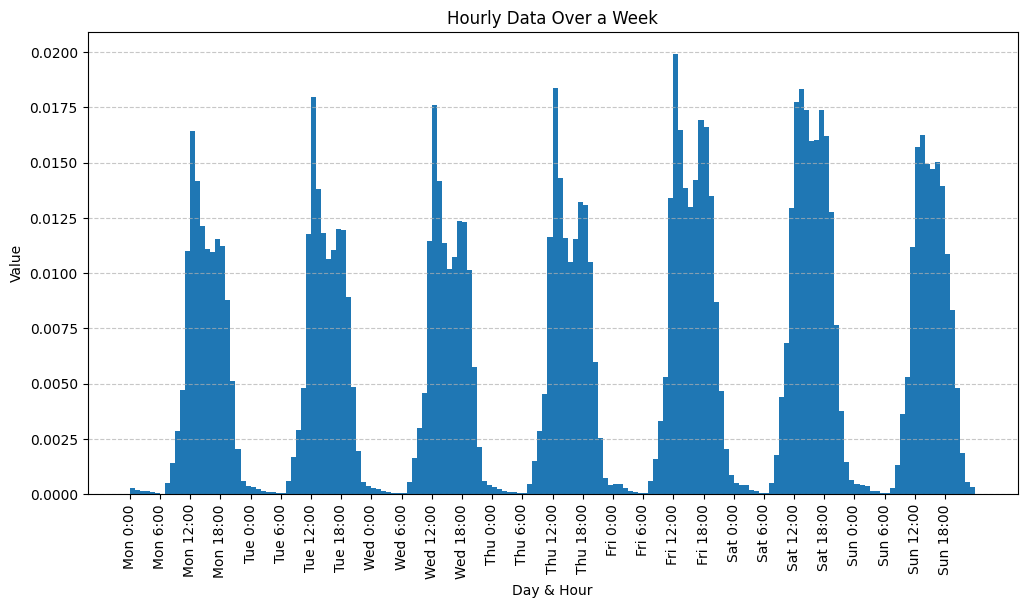

In [24]:
plot_data(data_by_concept['FAST_CASUAL'])

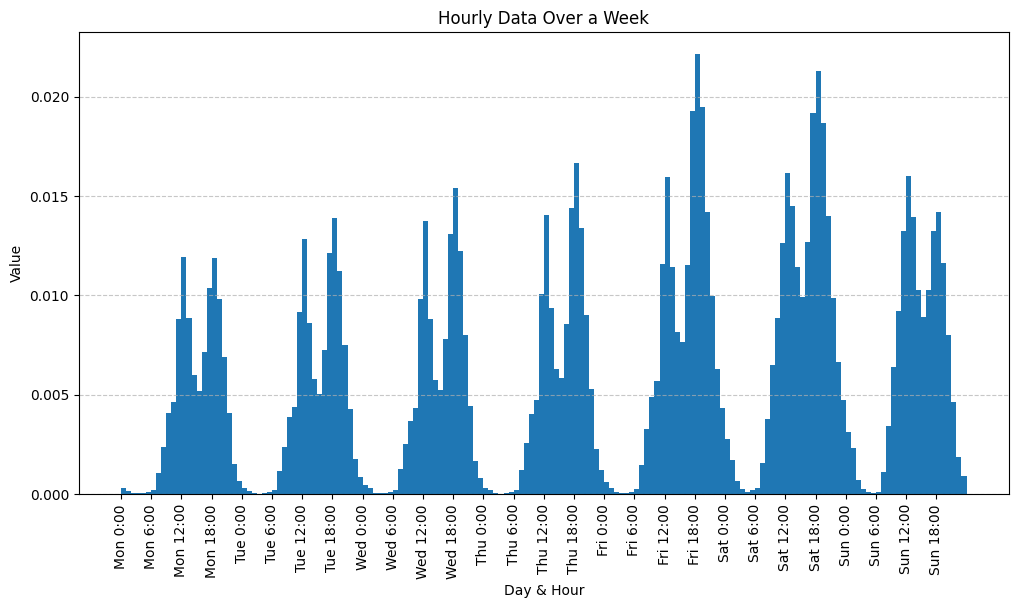

In [25]:
plot_data(data_by_concept['FAMILY_DINING'])

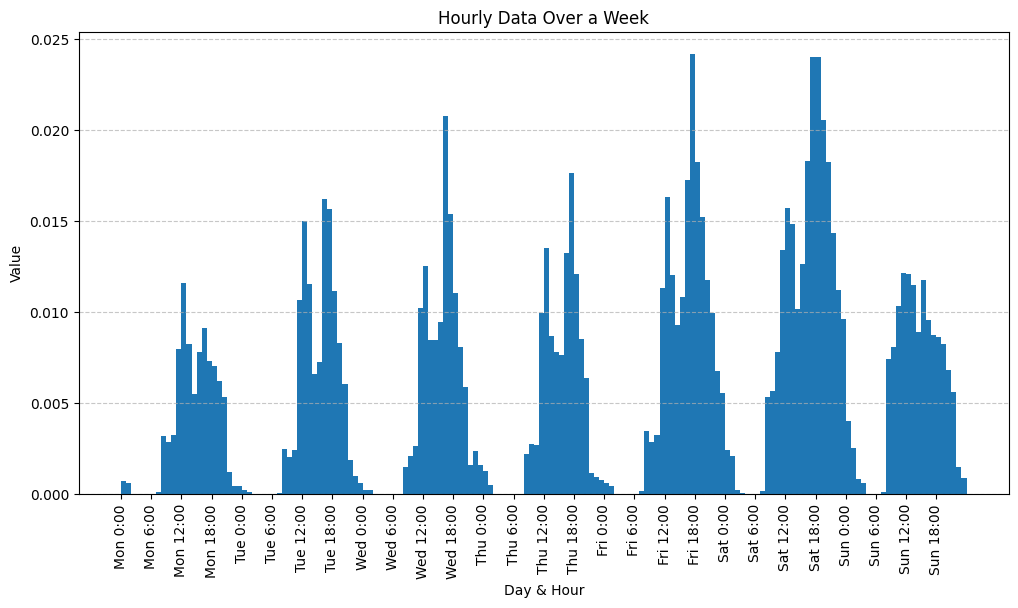

In [26]:
plot_data(data_by_concept['HOTEL'])

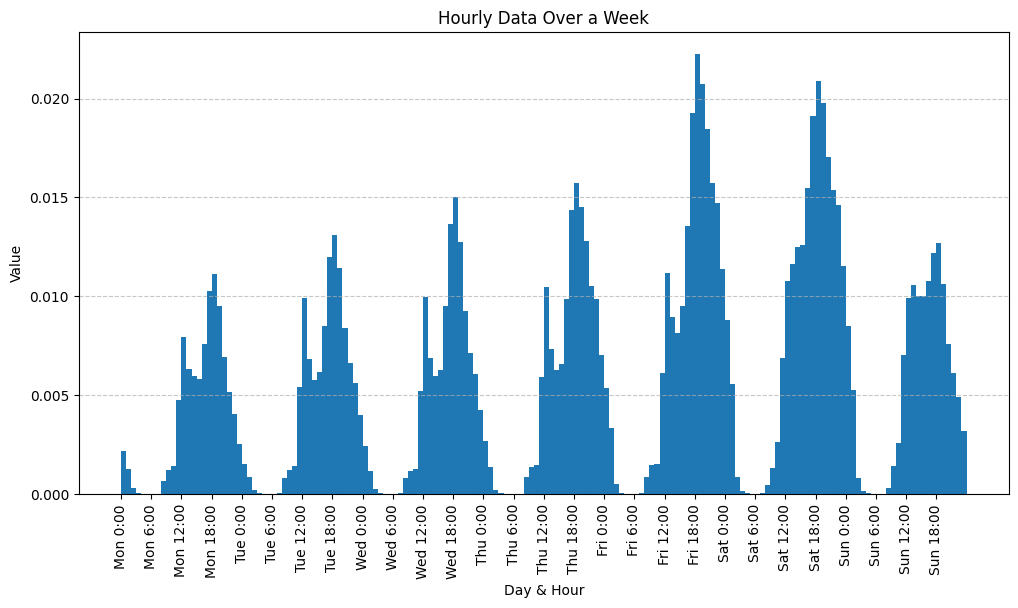

In [27]:
plot_data(data_by_concept['BAR'])